### PHASE 1 : GET DATA 

##### Pandas is a Python library used for working with data sets

In [31]:

import pandas as pd 

##### Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

In [32]:
import matplotlib.pyplot as plt

##### Numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

In [33]:
import numpy as np 

##### A line of code in Matplotlib that changes the default size of figures created in your Python script. Specifically, it sets the figure's width to 10 inches and its height to 5 inches. This affects all subsequent figures created using plt.figure() or functions that create subplots, unless explicitly overridden. 

In [34]:
# Set the default figure size for plots
plt.rcParams['figure.figsize'] = [10, 5]

### Importing Data

#####  The dataset is in CSV file but I want it to be a data frame. Now within pandas, that's what remember pd says within pandas there's a function called read_csv, which reads a CSV and turns it into a data frame. So this line here is telling me I've got a data frame, I'm calling bike_df. So bike_df is I'm taking this data and I'm turning it into a data frame.

In [35]:
bike_df = pd.read_csv('bike_sharing_daily.csv')
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


#####  Here We are going to add another feature which is called date. And what it's going to do is use another pandas function, which takes a date time and turns a string into a date time. So this is a string and it's going to turn it into a datetime object, which is a kind of number.

In [36]:
bike_df['date'] = pd.to_datetime(bike_df['dteday'])
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-02
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-03
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-04
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012-12-27
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012-12-28
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012-12-29
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012-12-30


### PHASE 2: PLAY WITH DATA

#### It's got three different things in it. It's got the date, it's got the count, and it's got the weather situation. Here, the weather situation was one, two or three. The count is a number with thousands. The date is a date.

##### Here, Yellow is bad weather. Purple is best weather and blue is the in-between.

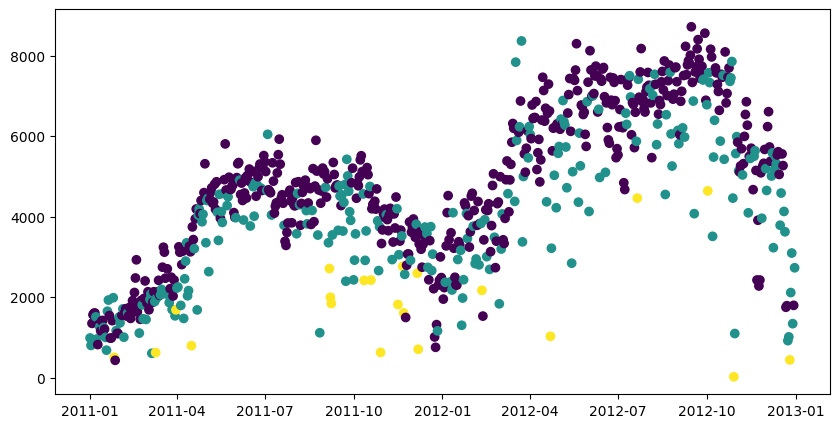

In [37]:
# df.plot.scatter(x='dteday', y='cnt')
plt.scatter(bike_df['date'], bike_df['cnt'], c = bike_df['weathersit'])

In [38]:
# when the weather situation is one, the average count of bikes rented is:
bike_df[bike_df['weathersit']==1]['cnt'].mean()

np.float64(4876.7861771058315)

In [39]:
# when the weather situation is two, the average count of bikes rented is:
bike_df[bike_df['weathersit']==2]['cnt'].mean()

np.float64(4035.862348178138)

In [40]:
# when the weather situation is three, the average count of bikes rented is:
bike_df[bike_df['weathersit']==3]['cnt'].mean()

np.float64(1803.2857142857142)

#### It's got the temperature against the count.

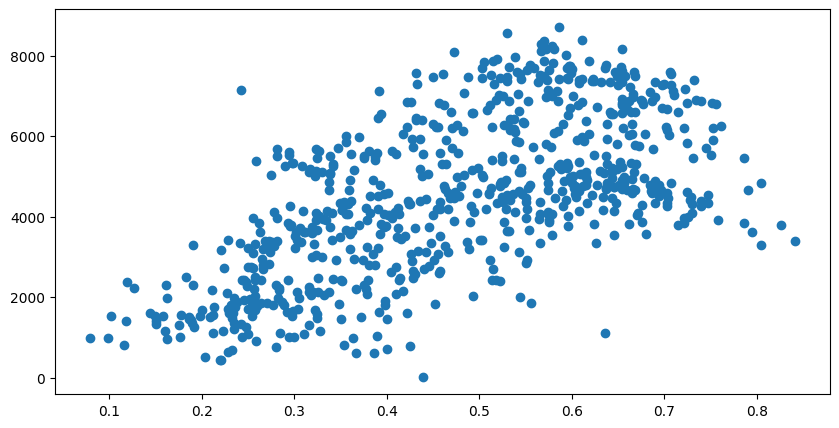

In [41]:
plt.scatter(bike_df['atemp'], bike_df['cnt'])

### Temperature and Correlation

In [42]:
# Calculate the correlation between 'cnt' and 'atemp'
bike_df[['cnt', 'atemp']].corr()

,cnt,atemp
cnt,1.000000,0.631066
atemp,0.631066,1.000000


In [43]:
# Calculate the correlation between 'cnt' and 'temp'
bike_df[['cnt', 'temp']].corr()

,cnt,temp
cnt,1.000000,0.627494
temp,0.627494,1.000000


In [44]:
# Calculate the correlation among 'cnt', 'atemp', 'temp', 'hum', 'windspeed' and 'weathersit'
bike_df[['cnt', 'atemp', 'temp', 'hum', 'windspeed', 'weathersit']].corr()

,cnt,atemp,temp,hum,windspeed,weathersit
cnt,1.000000,0.631066,0.627494,-0.100659,-0.234545,-0.297391
atemp,0.631066,1.000000,0.991702,0.139988,-0.183643,-0.121583
temp,0.627494,0.991702,1.000000,0.126963,-0.157944,-0.120602
hum,-0.100659,0.139988,0.126963,1.000000,-0.248489,0.591045
windspeed,-0.234545,-0.183643,-0.157944,-0.248489,1.000000,0.039511
weathersit,-0.297391,-0.121583,-0.120602,0.591045,0.039511,1.000000


### PHASE 3 : IMPLEMENT LEARNING
LEARNING MODEL - LINEAR REGRESSION 

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
# Create a linear regression model
lr = LinearRegression() 
# Fit the model using 'atemp' as the independent variable and 'cnt' as the dependent variable
lr.fit(bike_df['atemp'].values.reshape(-1, 1), bike_df['cnt'].values.reshape(-1, 1))

LinearRegression()

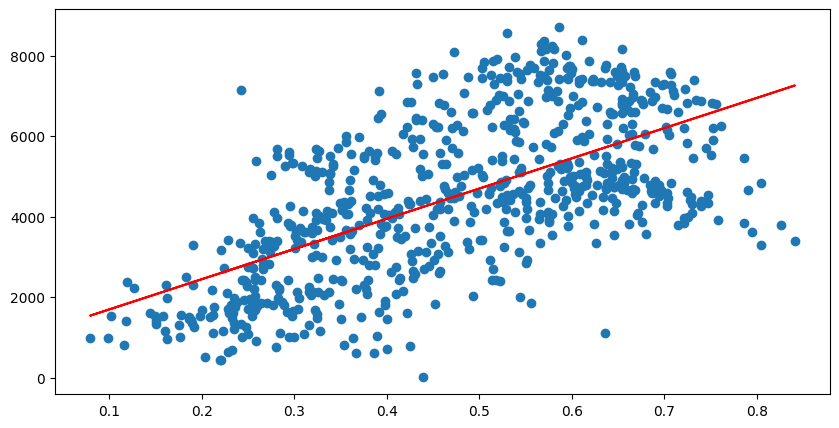

In [47]:
# Plot the scatter plot of 'atemp' vs 'cnt' and the regression line
plt.scatter(bike_df['atemp'], bike_df['cnt']) 
# Regression line
plt.plot(bike_df['atemp'], lr.predict(bike_df['atemp'].values.reshape(-1, 1)), c='red')

Text(0.5, 1.0, 'Residuals of the Linear Regression Model')

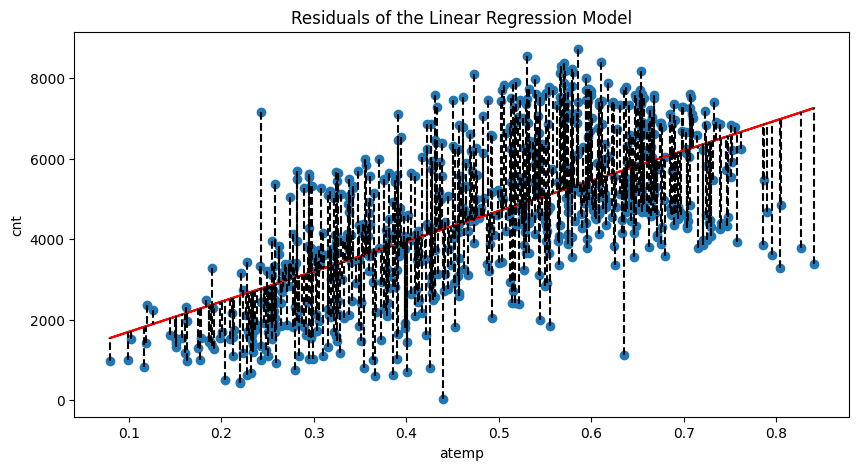

In [48]:
# plot fitted line
plt.scatter(bike_df['atemp'], bike_df['cnt'])
plt.plot(bike_df['atemp'], lr.predict(bike_df['atemp'].values.reshape(-1, 1)), c='red') 

# plot the residuals
for i in range(len(bike_df['atemp'])):
    plt.plot(
        [bike_df['atemp'].iloc[i], bike_df['atemp'].iloc[i]],
        [bike_df['cnt'].iloc[i], lr.predict([[bike_df['atemp'].iloc[i]]])[0][0]], 
        c='black', linestyle='--'
    )
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.title('Residuals of the Linear Regression Model')

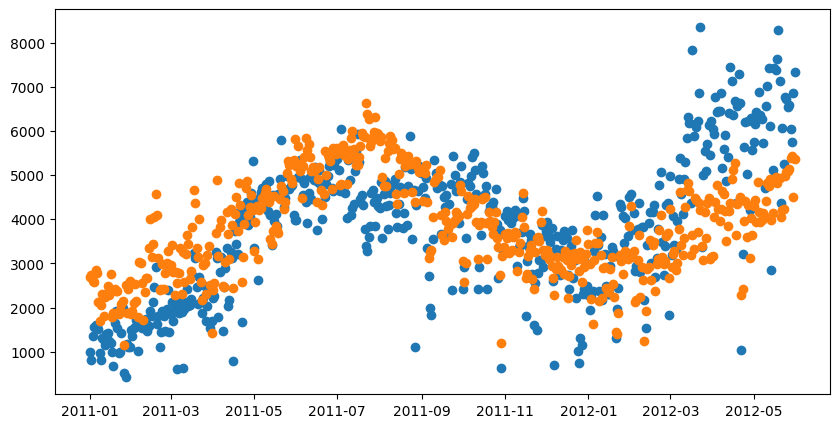

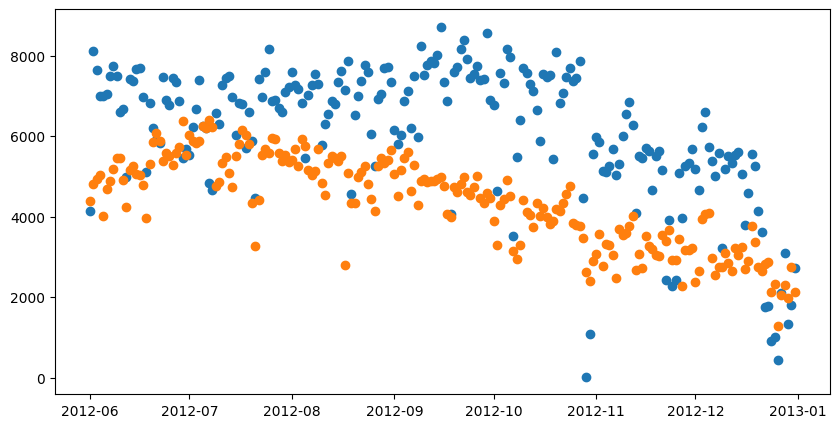

np.float64(2186.2905025086106)

In [57]:
training_set = bike_df[bike_df['date'] < '2012-06-01']
validation_set = bike_df[bike_df['date'] >= '2012-06-01']

training_inputs = training_set[['atemp', 'workingday', 'hum', 'weathersit']].values
training_outputs = training_set[['cnt']].values

validation_inputs = validation_set[['atemp', 'workingday', 'hum', 'weathersit']].values
validation_outputs = validation_set[['cnt']].values

lr = LinearRegression()
lr.fit(training_inputs, training_outputs)

plt.scatter(training_set['date'], training_set['cnt'])
plt.scatter(training_set['date'], lr.predict(training_inputs))
plt.show()

# plt.scatter(lr.predict(validation_inputs), validation_outputs)
plt.scatter(validation_set['date'], validation_set['cnt'])
plt.scatter(validation_set['date'], lr.predict(validation_inputs))
plt.show()

rmse = np.sqrt(((lr.predict(validation_inputs) - validation_outputs)**2).mean())
rmse

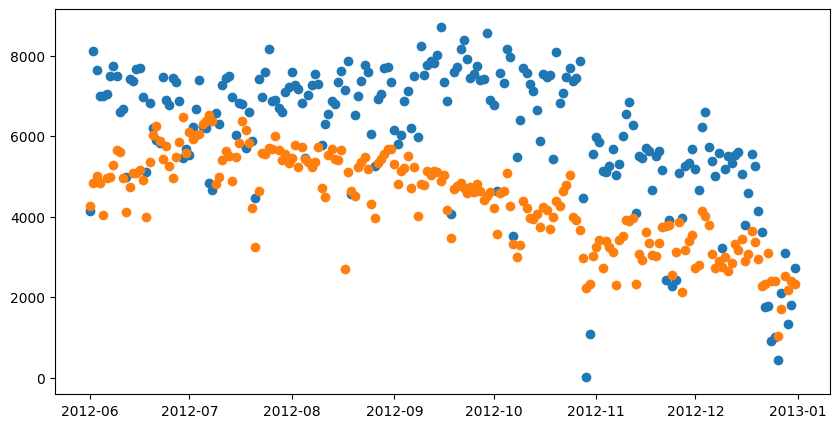

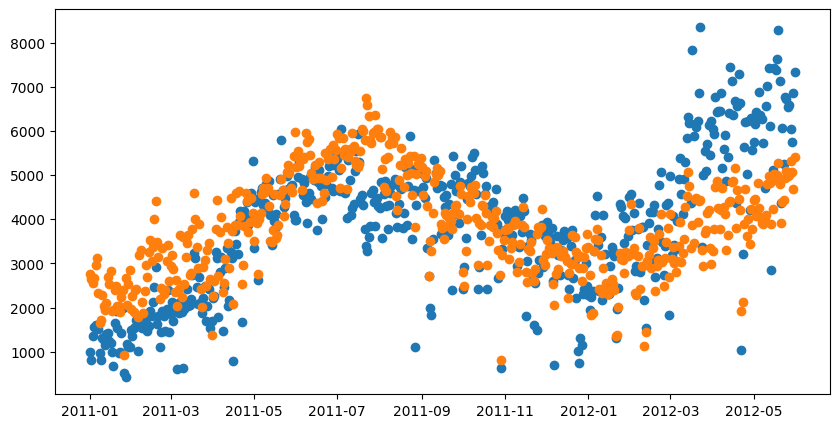

np.float64(2139.201362460237)

In [58]:
training_set = bike_df[bike_df['date'] < '2012-06-01']
validation_set = bike_df[bike_df['date'] >= '2012-06-01']

training_inputs = training_set[['atemp', 'workingday', 'hum', 'weathersit', 'windspeed']].values
training_outputs = training_set[['cnt']].values

validation_inputs = validation_set[['atemp', 'workingday', 'hum', 'weathersit', 'windspeed']].values
validation_outputs = validation_set[['cnt']].values

lr = LinearRegression()
lr.fit(training_inputs, training_outputs)


# plt.scatter(lr.predict(validation_inputs), validation_outputs)
plt.scatter(validation_set['date'], validation_set['cnt'])
plt.scatter(validation_set['date'], lr.predict(validation_inputs))
plt.show()

plt.scatter(training_set['date'], training_set['cnt'])
plt.scatter(training_set['date'], lr.predict(training_inputs))
plt.show()

rmse = np.sqrt(((lr.predict(validation_inputs) - validation_outputs)**2).mean())
rmse

### BACK TO PHASE 2 : FEATURE ENGINEERING

This calculates the average of the past 7 days by taking the difference between today’s cumulative sum and the cumulative sum 7 days ago, and dividing by 7

In [59]:
bike_df['last_week'] = (bike_df['cnt'].cumsum()- bike_df['cnt'].cumsum().shift(7))/7
bike_df = bike_df.dropna()
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,last_week
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,2011-01-08,1341.000000
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,2011-01-09,1344.000000
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,2011-01-10,1340.000000
10,11,2011-01-11,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263,2011-01-11,1297.285714
11,12,2011-01-12,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.304627,25,1137,1162,2011-01-12,1234.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012-12-27,1663.857143
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012-12-28,1588.428571
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012-12-29,1530.142857
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012-12-30,1531.428571


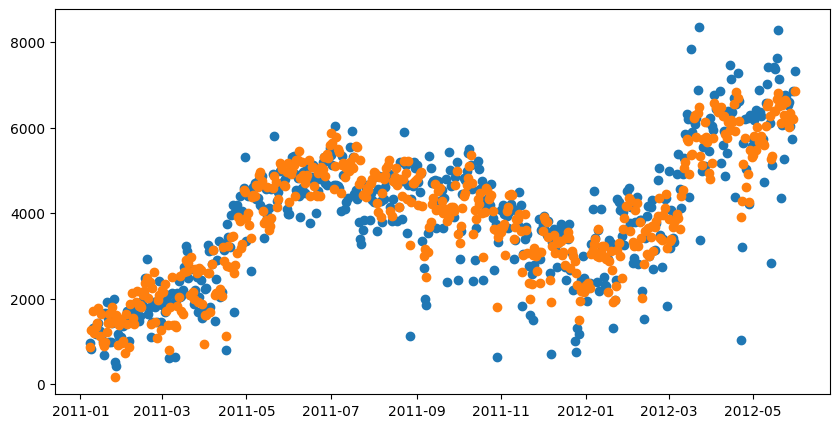

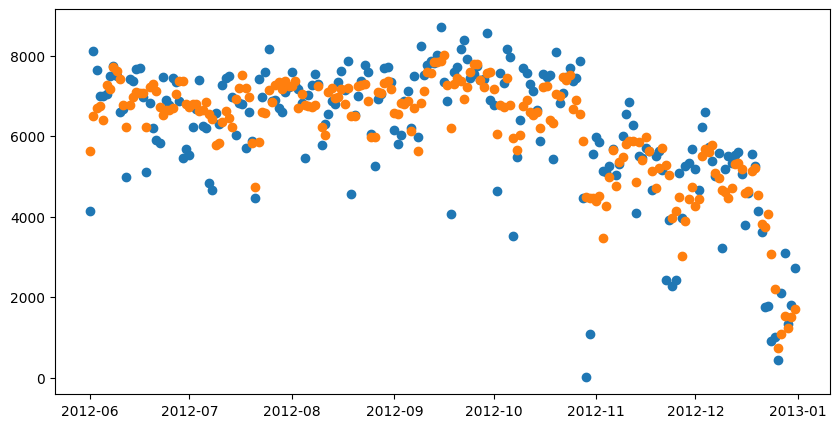

np.float64(925.6635629822425)

In [60]:
training_set = bike_df[bike_df['date'] < '2012-06-01']
validation_set = bike_df[bike_df['date'] >= '2012-06-01']

training_inputs = training_set[['atemp', 'workingday', 'hum', 'weathersit', 'last_week', 'windspeed']].values
training_outputs = training_set[['cnt']].values

validation_inputs = validation_set[['atemp', 'workingday', 'hum', 'weathersit', 'last_week', 'windspeed']].values
validation_outputs = validation_set[['cnt']].values

lr = LinearRegression()
lr.fit(training_inputs, training_outputs)

plt.scatter(training_set['date'], training_set['cnt'])
plt.scatter(training_set['date'], lr.predict(training_inputs))
plt.show()

# plt.scatter(lr.predict(validation_inputs), validation_outputs)
plt.scatter(validation_set['date'], validation_set['cnt'])
plt.scatter(validation_set['date'], lr.predict(validation_inputs))
plt.show()

rmse = np.sqrt(((lr.predict(validation_inputs) - validation_outputs)**2).mean())
rmse

In [68]:
# Safely assign 30-day rolling average
bike_df.loc[:, 'last_month'] = bike_df['cnt'].rolling(window=30).mean()

# Drop rows with NaN (first 29 rows)
bike_df = bike_df.dropna()
bike_df


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,last_week,last_month
154,155,2011-06-04,2,0,6,0,6,0,1,0.635000,0.594696,0.456250,0.123142,1869,3473,5342,2011-06-04,4637.714286,4538.266667
155,156,2011-06-05,2,0,6,0,0,0,2,0.648333,0.616804,0.652500,0.138692,1685,3221,4906,2011-06-05,4654.571429,4548.200000
156,157,2011-06-06,2,0,6,0,1,1,1,0.678333,0.621858,0.600000,0.121896,673,3875,4548,2011-06-06,4718.857143,4542.666667
157,158,2011-06-07,2,0,6,0,2,1,1,0.707500,0.655950,0.597917,0.187808,763,4070,4833,2011-06-07,4840.428571,4559.333333
158,159,2011-06-08,2,0,6,0,3,1,1,0.775833,0.727279,0.622083,0.136817,676,3725,4401,2011-06-08,4901.428571,4560.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012-12-27,1663.857143,4366.766667
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012-12-28,1588.428571,4294.600000
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012-12-29,1530.142857,4161.866667
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012-12-30,1531.428571,4032.800000


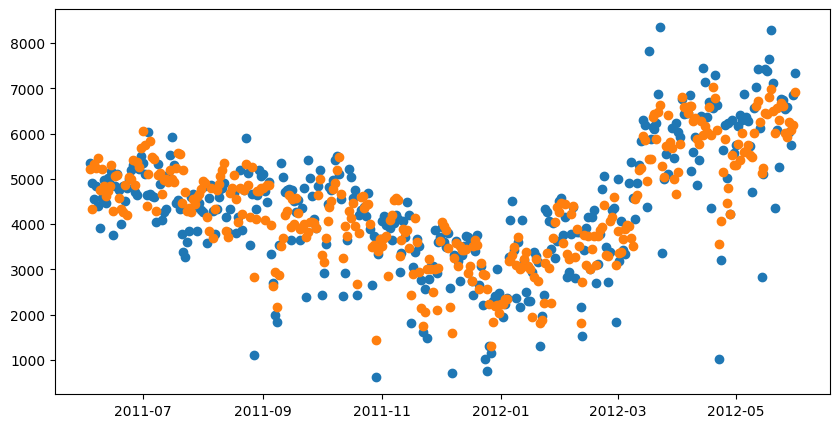

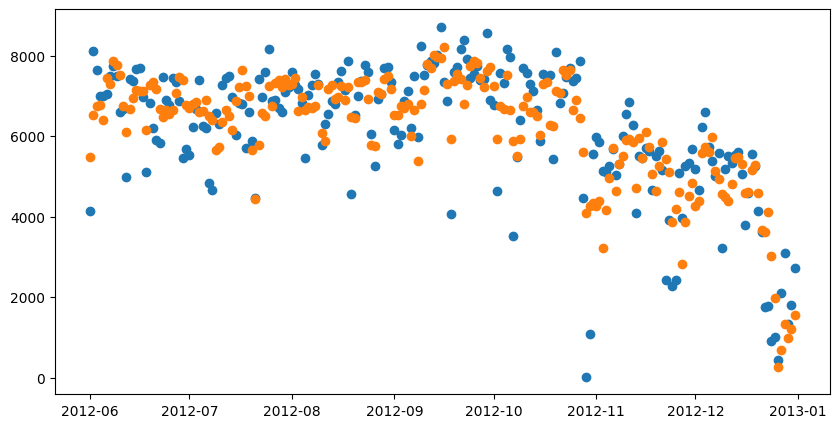

np.float64(921.2996558362975)

In [69]:
training_set = bike_df[bike_df['date'] < '2012-06-01']
validation_set = bike_df[bike_df['date'] >= '2012-06-01']

training_inputs = training_set[['atemp', 'workingday', 'hum', 'weathersit', 'last_week', 'last_month', 'windspeed']].values
training_outputs = training_set[['cnt']].values

validation_inputs = validation_set[['atemp', 'workingday', 'hum', 'weathersit', 'last_week', 'last_month', 'windspeed']].values
validation_outputs = validation_set[['cnt']].values

lr = LinearRegression()
lr.fit(training_inputs, training_outputs)

plt.scatter(training_set['date'], training_set['cnt'])
plt.scatter(training_set['date'], lr.predict(training_inputs))
plt.show()

# plt.scatter(lr.predict(validation_inputs), validation_outputs)
plt.scatter(validation_set['date'], validation_set['cnt'])
plt.scatter(validation_set['date'], lr.predict(validation_inputs))
plt.show()

rmse = np.sqrt(((lr.predict(validation_inputs) - validation_outputs)**2).mean())
rmse